<a href="https://colab.research.google.com/github/vaibhavtiwari/OpenCV/blob/main/faces_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Training Face Recognition


In [ ]:
people = ['Angira','Ben Afflek','Matthew','Shirley','Tom Cruise']
DIR = r'/content/drive/MyDrive/FacesDataset'
haar_cascade = cv.CascadeClassifier('/content/sample_data/haar_face.xml')


In [ ]:
features = []
labels = []
def create_train():
  for person in people:
    path = os.path.join(DIR,person)
    label = people.index(person)
    
    for img in os.listdir(path):
      if not img.startswith('.'):
        img_path = os.path.join(path,img)
        img_array = cv.imread(img_path)
        img_gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
        faces_rect = haar_cascade.detectMultiScale(img_gray,scaleFactor=1.1,minNeighbors=4)

      for (x,y,w,h) in faces_rect:
        faces_roi = img_gray[y:y+h,x:x+w]
        features.append(faces_roi)
        labels.append(label)

In [ ]:
create_train()
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')

Length of the features = 91
Length of the labels = 91


In [ ]:
features = np.array(features,dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

#train the Recognizer on the features list and the label list
face_recognizer.train(features,labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy',features)
np.save('labels.npy',labels)

# Face Recognition

In [ ]:
haar_cascade = cv.CascadeClassifier('/content/sample_data/haar_face.xml')

In [ ]:
features = np.load('/content/features.npy',allow_pickle=True)
labels = np.load('/content/labels.npy')
people = ['Angira','Ben Afflek','Matthew','Shirley','Tom Cruise']

In [ ]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('/content/face_trained.yml')

In [161]:
img = cv.imread(r'/content/drive/MyDrive/Validation dataset/unU7tVAz_400x400.jpg')

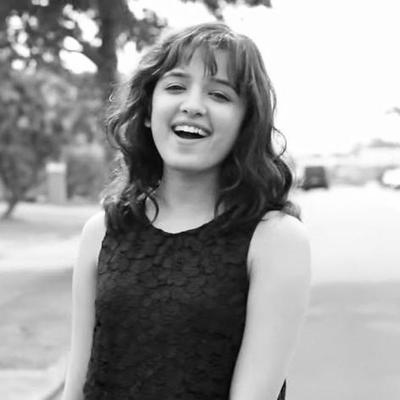

In [162]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [163]:
#Detect the face in image
faces_rect = haar_cascade.detectMultiScale(img_gray,1.1,4)

Label = Matthew with a confidence of 88.99627827097775


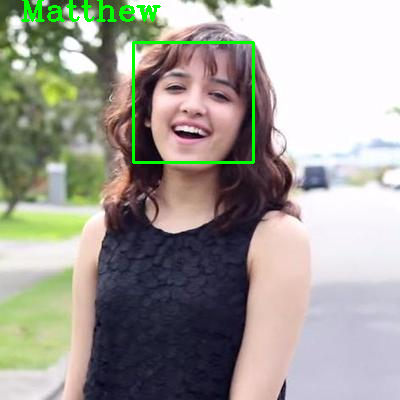

In [164]:
for (x,y,w,h) in faces_rect:
  faces_roi = img_gray[x:x+w,y:y+h]

  label,confidence = face_recognizer.predict(faces_roi)
  print(f'Label = {people[label]} with a confidence of {confidence}')

  cv.putText(img,str(people[label]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),thickness=2)
  cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)

cv2_imshow(img)